In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Exploratory Data Analysis (EDA) of the Housing Dataset
In this section, we will perform an Exploratory Data Analysis (EDA) on the housing dataset. EDA helps us understand the underlying structure of the data, identify patterns, detect anomalies, and check assumptions through statistical summaries and visualizations. By exploring the dataset, we aim to gain insights into the distribution of variables, relationships between features, and potential factors influencing house prices. This analysis will guide further data preprocessing and modeling steps.

### Preprcessing

In [3]:
# loading dataset
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# getting some information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
# getting some statistical information
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Note: Converting Categorical Features to Numerical

In machine learning and data analysis, most algorithms require input features to be numerical. Categorical features, such as 'mainroad', 'guestroom', or 'furnishingstatus', contain string values (e.g., 'yes', 'no', 'furnished') that cannot be directly used by these algorithms. Therefore, we convert categorical features to numerical values (e.g., mapping 'yes' to 1 and 'no' to 0) to make the data suitable for modeling. This transformation enables algorithms to interpret and process the data correctly, improving model performance and ensuring accurate analysis.

In [9]:
# selecting categorical columns which could transform to binary
binary_columns = df[['mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea']]

In [10]:
binary_columns.head(1)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes


In [11]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [12]:
# mapping categorical columns to numerical by for loop
for i in binary_columns.columns:
    df[i] = df[i].map({'yes': 1 , 'no': 0}, )
df    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [13]:
# mapping 'furnishingstatus' to numerical
df['furnishing_num'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished':2})

In [14]:
# generating a new feature by converting 'area' to 'group_area'
bins= [1000, 5000, 10000, 20000]
labels = ['small', 'medium', 'large']
df['group_area'] = pd.cut(df['area'], bins= bins, labels=labels)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishing_num,group_area
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,2,medium
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,2,medium
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,medium
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,2,medium
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,2,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,small
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,small
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,small
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,2,small


In [15]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
furnishing_num      0
group_area          0
dtype: int64

In [16]:
# splitting dataset to two section , cat_df and num_df
cat_df = df[['furnishingstatus', 'group_area']]
num_df = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories' ,'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishing_num']]

num_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishing_num
0,13300000,7420,4,2,3,1,0,0,0,1,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,2


In [17]:
#finding out relationship between features by correlation method
num_df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishing_num
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.117382,0.150477


<Axes: >

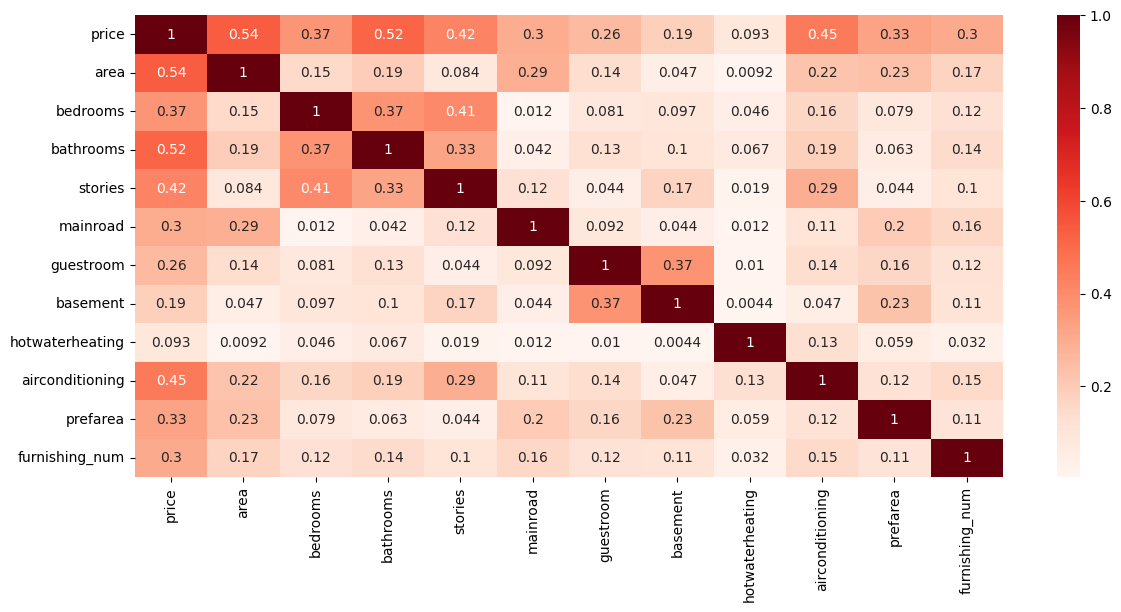

In [18]:
# visualizing correlation for better view by heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(abs(num_df.corr()), annot=True, cmap='Reds')

### Visualization
In this section, we will visualize various aspects of the housing dataset to better understand the distribution of features and their relationships with the target variable, `price`. Visualizations such as histograms, boxplots, scatter plots, and heatmaps will help identify trends, outliers, and correlations among variables. These insights are crucial for feature selection, data preprocessing, and building effective predictive models.

<Axes: xlabel='price', ylabel='Count'>

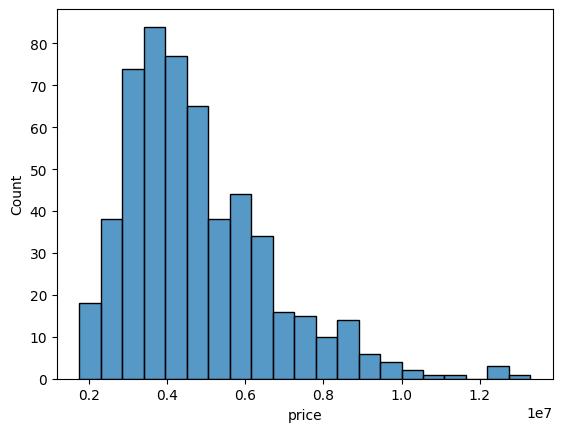

In [19]:
# visualizing distribution of 'price' feature 
sns.histplot (data= df , x='price' )

<Axes: xlabel='area', ylabel='Count'>

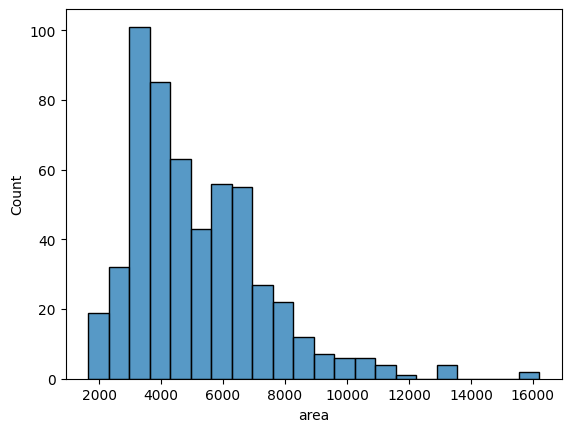

In [20]:
# visualizing distribution of 'area' feature
sns.histplot(data=df, x='area', kde=False)

<Axes: ylabel='price'>

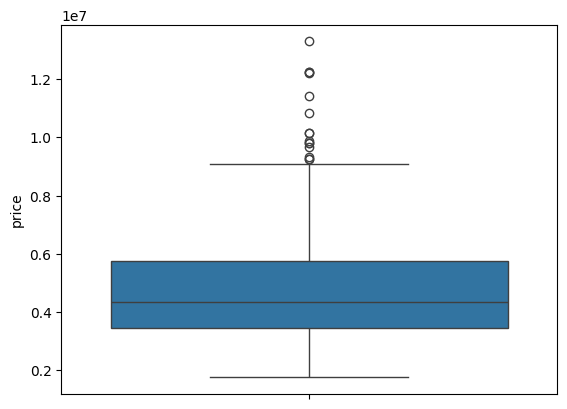

In [21]:
# detecting outliers and distribution shape of 'price'
sns.boxplot(data=df, y='price')

<Axes: ylabel='area'>

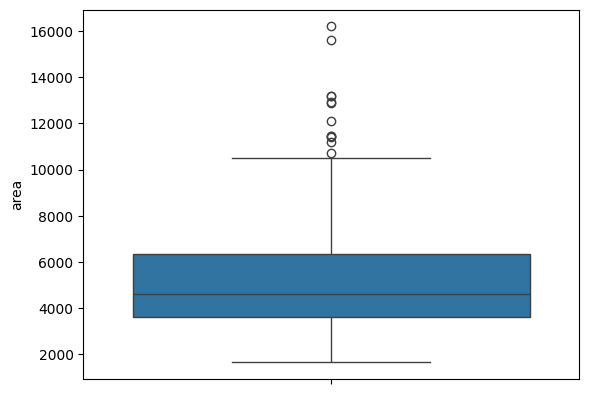

In [22]:
# detecting outliers and distribution shape of 'area'
sns.boxplot(data=df, y='area')

<Axes: xlabel='bathrooms', ylabel='price'>

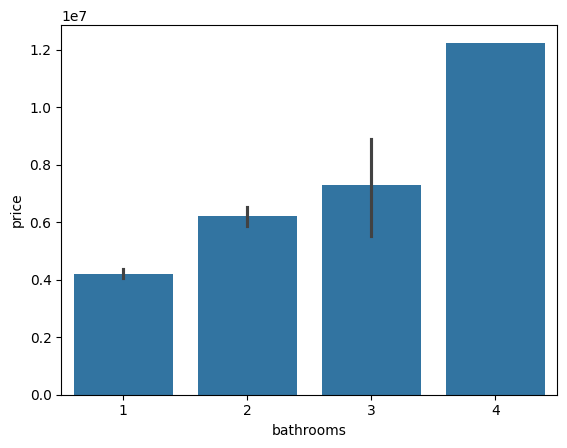

In [23]:
# visualizing 'bathrooms' feature 
sns.barplot(
    data=df,
    x='bathrooms',
    y='price',
)

<Axes: xlabel='furnishingstatus', ylabel='price'>

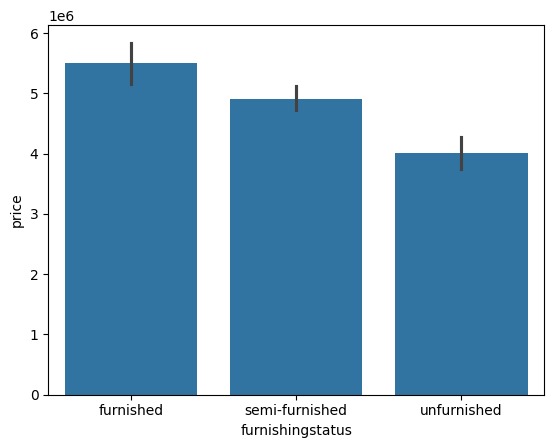

In [24]:
# visualizing 'furnishingstatus' 
sns.barplot(data=df, x='furnishingstatus', y='price')

<Axes: xlabel='airconditioning', ylabel='price'>

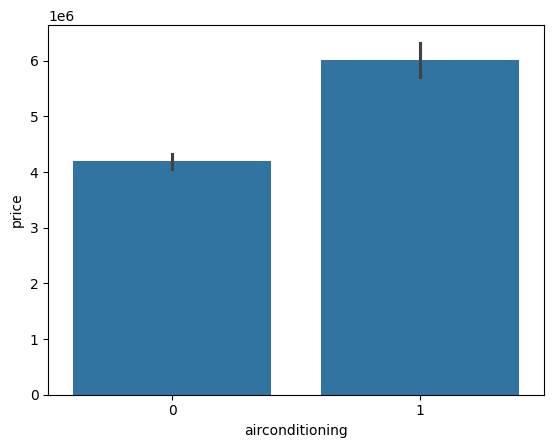

In [25]:
# visualizing 'airconditioning' feature 
sns.barplot(
    data=df,
    x='airconditioning',
    y='price'
)

<Axes: xlabel='prefarea', ylabel='price'>

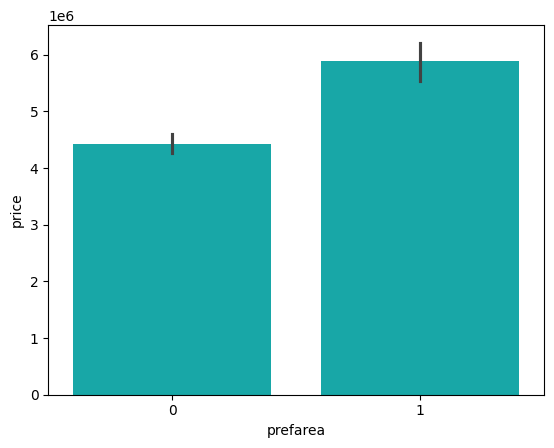

In [ ]:
# visualizing 'prefarea' feature 
sns.barplot(
    data=df,
    x='prefarea',
    y='price', color='c'
)

<Axes: xlabel='hotwaterheating', ylabel='price'>

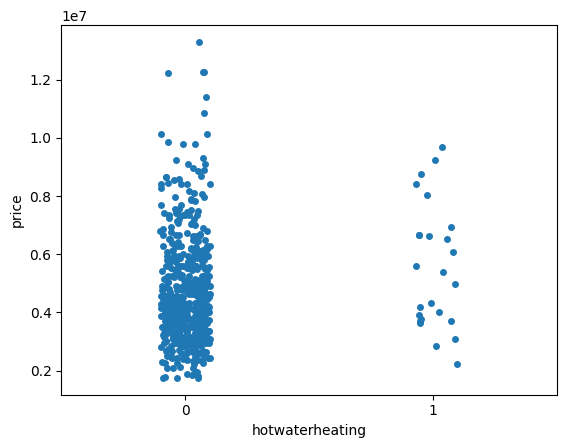

In [56]:
# visualizing 'hotwaterheating'
sns.stripplot(data=df, x='hotwaterheating', y='price', jitter=True)

<Axes: xlabel='basement', ylabel='price'>

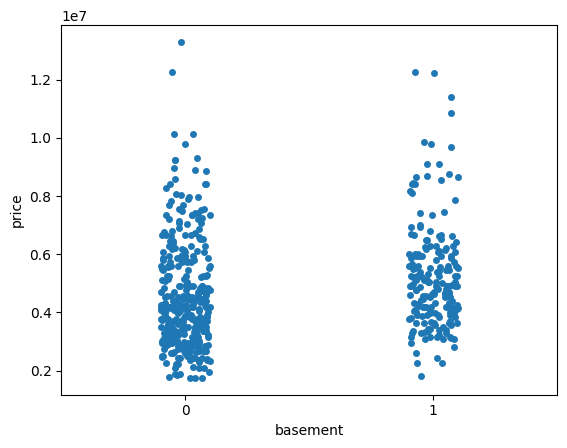

In [58]:
# visualizing 'basement'
sns.stripplot(data=df, x='basement', y='price', jitter=True)

<Axes: xlabel='guestroom', ylabel='price'>

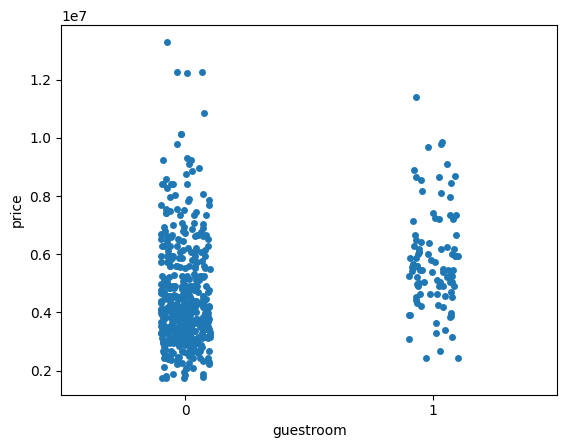

In [59]:
# visualizing 'guestroom' 
sns.stripplot(data=df, x='guestroom', y='price', jitter=True)